# Data analysis using pandas

In [49]:
import pandas as pd
from matplotlib import pyplot as plt

In [50]:
continents = pd.read_csv("continents-according-to-our-world-in-data.csv")
gdp = pd.read_csv("gdp-per-capita-maddison-project-database.csv")
life_expectancy = pd.read_csv("life-expectancy.csv")
population = pd.read_csv("population-with-un-projections.csv")

In [51]:
continents.head()

,Entity,Code,Year,World regions according to OWID
0,Afghanistan,AFG,2023,Asia
1,Aland Islands,ALA,2023,Europe
2,Albania,ALB,2023,Europe
3,Algeria,DZA,2023,Africa
4,American Samoa,ASM,2023,Oceania


In [52]:
gdp.head()

,Entity,Code,Year,GDP per capita,900793-annotations
0,Afghanistan,AFG,1950,1156.0,NaN
1,Afghanistan,AFG,1951,1170.0,NaN
2,Afghanistan,AFG,1952,1189.0,NaN
3,Afghanistan,AFG,1953,1240.0,NaN
4,Afghanistan,AFG,1954,1245.0,NaN


## Let's start with gdp
We can take a look at a column:

In [53]:
gdp["Year"]

0        1950
1        1951
2        1952
3        1953
4        1954
         ... 
21581    2018
21582    2019
21583    2020
21584    2021
21585    2022
Name: Year, Length: 21586, dtype: int64

## Check which values in the column are equal to 2022.

In [54]:
gdp["Year"] == 2022

0        False
1        False
2        False
3        False
4        False
         ...  
21581    False
21582    False
21583    False
21584    False
21585     True
Name: Year, Length: 21586, dtype: bool

## Select only the corresponding rows.

In [55]:
gdp[gdp["Year"] == 2022]

,Entity,Code,Year,GDP per capita,900793-annotations
72,Afghanistan,AFG,2022,1357.9878,NaN
151,Albania,ALB,2022,12978.1010,NaN
227,Algeria,DZA,2022,13506.4440,NaN
300,Angola,AGO,2022,6118.9050,NaN
453,Argentina,ARG,2022,18292.3180,NaN
...,...,...,...,...,...
21198,World,OWID_WRL,2022,16676.7500,NaN
21271,Yemen,YEM,2022,1959.3195,NaN
21372,Yugoslavia,OWID_YGS,2022,19352.3850,NaN
21484,Zambia,ZMB,2022,3342.4214,NaN


In [56]:
gdp = gdp[gdp["Year"] == 2022]
gdp.head()

,Entity,Code,Year,GDP per capita,900793-annotations
72,Afghanistan,AFG,2022,1357.9878,NaN
151,Albania,ALB,2022,12978.1010,NaN
227,Algeria,DZA,2022,13506.4440,NaN
300,Angola,AGO,2022,6118.9050,NaN
453,Argentina,ARG,2022,18292.3180,NaN


## What are those OWID_WRL codes above?
Let's look for rows with "Code" with length longer than 3.

In [57]:
gdp[gdp["Code"].str.len() > 3]

,Entity,Code,Year,GDP per capita,900793-annotations
3910,Czechoslovakia,OWID_CZS,2022,30640.914,NaN
19437,USSR,OWID_USS,2022,19354.709,NaN
21198,World,OWID_WRL,2022,16676.750,NaN
21372,Yugoslavia,OWID_YGS,2022,19352.385,NaN


## Let's remove those

In [58]:
gdp = gdp[gdp["Code"].str.len() == 3]
gdp.head()

,Entity,Code,Year,GDP per capita,900793-annotations
72,Afghanistan,AFG,2022,1357.9878,NaN
151,Albania,ALB,2022,12978.1010,NaN
227,Algeria,DZA,2022,13506.4440,NaN
300,Angola,AGO,2022,6118.9050,NaN
453,Argentina,ARG,2022,18292.3180,NaN


## The index isn't too useful, and we want to combine with other dataframes later

In [59]:
gdp = gdp.set_index("Code")
gdp.head()

,Entity,Year,GDP per capita,900793-annotations
Code,,,,
AFG,Afghanistan,2022,1357.9878,NaN
ALB,Albania,2022,12978.1010,NaN
DZA,Algeria,2022,13506.4440,NaN
AGO,Angola,2022,6118.9050,NaN
ARG,Argentina,2022,18292.3180,NaN


## Let's get rid of the last column (we'll see a different way of doing this later).

In [60]:
gdp = gdp[["Entity", "Year", "GDP per capita"]]
gdp.head()

,Entity,Year,GDP per capita
Code,,,
AFG,Afghanistan,2022,1357.9878
ALB,Albania,2022,12978.1010
DZA,Algeria,2022,13506.4440
AGO,Angola,2022,6118.9050
ARG,Argentina,2022,18292.3180


## Moving on to the continents

In [61]:
continents = continents[continents["Code"].str.len() == 3]
continents.head()

,Entity,Code,Year,World regions according to OWID
0,Afghanistan,AFG,2023,Asia
1,Aland Islands,ALA,2023,Europe
2,Albania,ALB,2023,Europe
3,Algeria,DZA,2023,Africa
4,American Samoa,ASM,2023,Oceania


## The name of the last column is sooooo long! let's rename it!

In [62]:
continents = continents.rename({"World regions according to OWID": "Region"}, axis=1)
continents.head()

,Entity,Code,Year,Region
0,Afghanistan,AFG,2023,Asia
1,Aland Islands,ALA,2023,Europe
2,Albania,ALB,2023,Europe
3,Algeria,DZA,2023,Africa
4,American Samoa,ASM,2023,Oceania


## Set the index to the Code column

In [63]:
continents = continents.set_index("Code")
continents.head()

,Entity,Year,Region
Code,,,
AFG,Afghanistan,2023,Asia
ALA,Aland Islands,2023,Europe
ALB,Albania,2023,Europe
DZA,Algeria,2023,Africa
ASM,American Samoa,2023,Oceania


## Now, let's combine them! with pd.merge

In [64]:
df = pd.merge(continents, gdp, on="Code")
df.head()

,Entity_x,Year_x,Region,Entity_y,Year_y,GDP per capita
Code,,,,,,
AFG,Afghanistan,2023,Asia,Afghanistan,2022,1357.9878
ALB,Albania,2023,Europe,Albania,2022,12978.1010
DZA,Algeria,2023,Africa,Algeria,2022,13506.4440
AGO,Angola,2023,Africa,Angola,2022,6118.9050
ARG,Argentina,2023,South America,Argentina,2022,18292.3180


## Oops, we don't need to keep the year at all, and let's only keep the Entity for the continent dataframe

In [65]:
continents = continents.drop("Year", axis=1)
gdp = gdp.drop(["Year", "Entity"], axis=1)
df = pd.merge(continents, gdp, on="Code")
df.head()

,Entity,Region,GDP per capita
Code,,,
AFG,Afghanistan,Asia,1357.9878
ALB,Albania,Europe,12978.1010
DZA,Algeria,Africa,13506.4440
AGO,Angola,Africa,6118.9050
ARG,Argentina,South America,18292.3180


# EXERCISE
do the same for population and life expectancy! -> rename the fields to "Life expectancy" and "Population"

In [66]:
continents = continents.rename({"World regions according to OWID": "Region"}, axis=1)
continents.head()

,Entity,Region
Code,,
AFG,Afghanistan,Asia
ALA,Aland Islands,Europe
ALB,Albania,Europe
DZA,Algeria,Africa
ASM,American Samoa,Oceania


In [67]:
life_expectancy.head()

,Entity,Code,Year,Period life expectancy at birth - Sex: total - Age: 0
0,Afghanistan,AFG,1950,28.1563
1,Afghanistan,AFG,1951,28.5836
2,Afghanistan,AFG,1952,29.0138
3,Afghanistan,AFG,1953,29.4521
4,Afghanistan,AFG,1954,29.6975


In [68]:
life_expectancy = life_expectancy.rename({"Period life expectancy at birth - Sex: total - Age: 0":"Life expectancy"}, axis=1)

In [69]:
life_expectancy = life_expectancy[life_expectancy["Code"].str.len() == 3]

In [70]:
life_expectancy = life_expectancy.set_index("Code")

In [71]:
life_expectancy.head()

,Entity,Year,Life expectancy
Code,,,
AFG,Afghanistan,1950,28.1563
AFG,Afghanistan,1951,28.5836
AFG,Afghanistan,1952,29.0138
AFG,Afghanistan,1953,29.4521
AFG,Afghanistan,1954,29.6975


In [72]:
population.head()

,Entity,Code,Year,Population - Sex: all - Age: all - Variant: estimates,Population - Sex: all - Age: all - Variant: medium
0,Afghanistan,AFG,1950,7776133.0,NaN
1,Afghanistan,AFG,1951,7879295.0,NaN
2,Afghanistan,AFG,1952,7987737.0,NaN
3,Afghanistan,AFG,1953,8096656.0,NaN
4,Afghanistan,AFG,1954,8207910.0,NaN


In [73]:
population = population.rename({"Population - Sex: all - Age: all - Variant: estimates":"Population"}, axis=1)

In [74]:
population = population.drop("Population - Sex: all - Age: all - Variant: medium", axis=1)

In [75]:
population = population[population["Code"].str.len() == 3]

In [76]:
population = population.set_index("Code")

In [77]:
population.head()

,Entity,Year,Population
Code,,,
AFG,Afghanistan,1950,7776133.0
AFG,Afghanistan,1951,7879295.0
AFG,Afghanistan,1952,7987737.0
AFG,Afghanistan,1953,8096656.0
AFG,Afghanistan,1954,8207910.0


## Let's merge these with the others!

In [78]:
df = pd.merge(df, life_expectancy, on="Code")
df = pd.merge(df, population, on="Code")

In [79]:
df.head()

,Entity_x,Region,GDP per capita,Entity_y,Year_x,Life expectancy,Entity,Year_y,Population
Code,,,,,,,,,
AFG,Afghanistan,Asia,1357.9878,Afghanistan,1950,28.1563,Afghanistan,1950,7776133.0
AFG,Afghanistan,Asia,1357.9878,Afghanistan,1950,28.1563,Afghanistan,1951,7879295.0
AFG,Afghanistan,Asia,1357.9878,Afghanistan,1950,28.1563,Afghanistan,1952,7987737.0
AFG,Afghanistan,Asia,1357.9878,Afghanistan,1950,28.1563,Afghanistan,1953,8096656.0
AFG,Afghanistan,Asia,1357.9878,Afghanistan,1950,28.1563,Afghanistan,1954,8207910.0


In [80]:
df = df[df["Year_x"] == 2022]

In [81]:
df = df[df["Year_y"] == 2022]

In [82]:
df.head()

,Entity_x,Region,GDP per capita,Entity_y,Year_x,Life expectancy,Entity,Year_y,Population
Code,,,,,,,,,
AFG,Afghanistan,Asia,1357.9878,Afghanistan,2022,65.6170,Afghanistan,2022,40578801.0
ALB,Albania,Europe,12978.1010,Albania,2022,78.7688,Albania,2022,2827562.0
DZA,Algeria,Africa,13506.4440,Algeria,2022,76.1289,Algeria,2022,45477339.0
AGO,Angola,Africa,6118.9050,Angola,2022,64.2455,Angola,2022,35634984.0
ARG,Argentina,South America,18292.3180,Argentina,2022,75.8061,Argentina,2022,45407866.0


In [83]:
df.head()

,Entity_x,Region,GDP per capita,Entity_y,Year_x,Life expectancy,Entity,Year_y,Population
Code,,,,,,,,,
AFG,Afghanistan,Asia,1357.9878,Afghanistan,2022,65.6170,Afghanistan,2022,40578801.0
ALB,Albania,Europe,12978.1010,Albania,2022,78.7688,Albania,2022,2827562.0
DZA,Algeria,Africa,13506.4440,Algeria,2022,76.1289,Algeria,2022,45477339.0
AGO,Angola,Africa,6118.9050,Angola,2022,64.2455,Angola,2022,35634984.0
ARG,Argentina,South America,18292.3180,Argentina,2022,75.8061,Argentina,2022,45407866.0


In [84]:
regions = list(set(df["Region"]))

In [85]:
regions.sort()
print(regions)

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']


## Pick some colors

In [86]:
colors = ["red", "green", "yellow", "blue", "violet", "pink"]

plotting Africa in red
plotting Asia in green
plotting Europe in yellow
plotting North America in blue
plotting Oceania in violet
plotting South America in pink


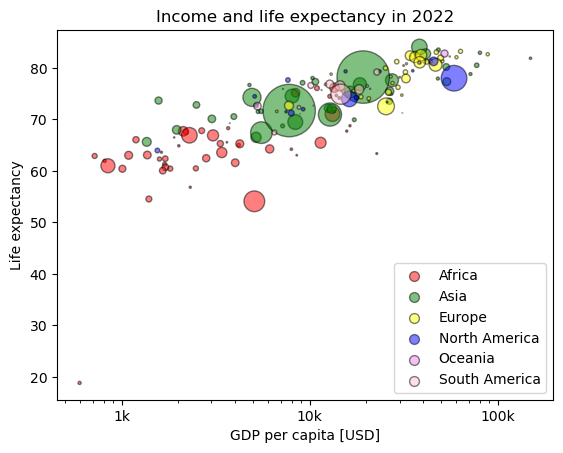

In [87]:
for i in range(6):
    print("plotting " + regions[i] + " in " + colors[i])
    region_frame = df[df["Region"] == regions[i]]
    region_frame = region_frame.sort_values("Population")
    
    plt.scatter(region_frame["GDP per capita"], 
                region_frame["Life expectancy"], 
                s=region_frame["Population"]/1000000, 
                alpha=0.5, 
                c=colors[i], 
                edgecolors="black",
                label=regions[i])


lgnd = plt.legend()
# making sure the sizes are the same, from https://stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend
for handle in lgnd.legend_handles:
    handle.set_sizes([50.0])
    
plt.title("Income and life expectancy in 2022")

# the x axis
plt.xlabel("GDP per capita [USD]")
plt.xscale("log")
tick_values = [1000, 10000, 100000]
tick_labels = ["1k", "10k", "100k"]
plt.xticks(tick_values, tick_labels)
plt.ylabel("Life expectancy")
plt.savefig("life_expectancy_2022.png")
plt.show()

In [92]:
life_expectancy[life_expectancy["Life expectancy"]<20]

,Entity,Year,Life expectancy
Code,,,
KHM,Cambodia,1975,12.7845
KHM,Cambodia,1976,11.6323
KHM,Cambodia,1977,11.2952
KHM,Cambodia,1978,11.5726
CAF,Central African Republic,2009,14.6655
CAF,Central African Republic,2022,18.8177
CUB,Cuba,1899,18.9000
ISL,Iceland,1846,18.6800
ISL,Iceland,1860,19.8400


In [89]:
df.loc["CAF"]

Entity_x           Central African Republic
Region                               Africa
GDP per capita                      596.393
Entity_y           Central African Republic
Year_x                                 2022
Life expectancy                     18.8177
Entity             Central African Republic
Year_y                                 2022
Population                        5097987.0
Name: CAF, dtype: object

In [42]:
# looks like an error (according to Google, it was about 54 years)
df = df.drop("CAF")